# Ejemplo snscrape

## Realizar un análisis de sentimiento de 1,000 tweets para saber el consenso general (positivo, negativo, neutral) del término de búsqueda "Donald Trump".

Librerías utilizadas

In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import snscrape.modules.twitter as sntwitter
import matplotlib.pyplot  as plt

Se define el Scrapper

In [2]:
scraper = sntwitter.TwitterSearchScraper("Donald Trump")

In [3]:
for tweet in scraper.get_items():
    break

Objeto tweet

In [4]:
tweet

Tweet(url='https://twitter.com/Aenfoco/status/1638393121863094272', date=datetime.datetime(2023, 3, 22, 4, 12, 14, tzinfo=datetime.timezone.utc), rawContent='#PensándoloBien (programa completo) con Gonzalo Sánchez - 21/03/23 https://t.co/x29DQXxtws vía @Aenfoco #BuenMartes #corralito IVA al 24% El PBI Ventura #DonaldTrump Duggan Corea del Norte Corazza Otoño Ferraresi', renderedContent='#PensándoloBien (programa completo) con Gonzalo Sánchez - 21/03/23 actualidadenfoco.com/pensandolo-bie… vía @Aenfoco #BuenMartes #corralito IVA al 24% El PBI Ventura #DonaldTrump Duggan Corea del Norte Corazza Otoño Ferraresi', id=1638393121863094272, user=User(username='Aenfoco', id=1026266576176205825, displayname='Actualidad en foco', rawDescription='Noticias e información de los principales programas de radio de AMBA. Temas de actualidad nacional. CM: @riddlyrabbit - Foto: VH S/Pexels.', renderedDescription='Noticias e información de los principales programas de radio de AMBA. Temas de actualidad na

Se extraen los datos importantes de un tweet y se guardan en un dataframe

In [5]:
tweets = []
ntweets = 100
for i, tweet in tqdm(enumerate(scraper.get_items()), total = ntweets):
    data = [
        tweet.date,
        tweet.id,
        tweet.rawContent,
        tweet.user.username,
        tweet.likeCount,
        tweet.retweetCount
    ]
    tweets.append(data)
    
    if i >= ntweets:
        break

df = pd.DataFrame(
    tweets, columns=["date", "id", "content", "username", "like_count", "retweet_count"])
df.to_csv("../results/tweets.csv", index=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [6]:
df

,date,id,content,username,like_count,retweet_count
0,2023-03-22 04:12:14+00:00,1638393121863094272,#PensándoloBien (programa completo) con Gonzal...,Aenfoco,0,0
1,2023-03-22 04:12:07+00:00,1638393090783191040,@JoJoFromJerz 8 years and counting....so when'...,whipplewart,0,0
2,2023-03-22 04:12:05+00:00,1638393082273226753,@noclador Who's Donald Trump?,Zatananas,0,0
3,2023-03-22 04:12:03+00:00,1638393075138437122,Donald trump is NOT a Republican !!!!!He is a ...,EricaGotcha,0,0
4,2023-03-22 04:12:01+00:00,1638393064619233281,"Hey Jim Jordan Your committee is a joke, espec...",LKaye2,0,0
...,...,...,...,...,...,...
96,2023-03-22 04:04:26+00:00,1638391156085239808,"@hornersaz53 @LeadingReport I heard, Pres. Don...",TinaMSchmidt2,0,0
97,2023-03-22 04:04:24+00:00,1638391149894283264,@The_Trump_Train Yes he needs too be arrested....,Elizabe13881685,0,0
98,2023-03-22 04:04:24+00:00,1638391149533511683,Donald Trump may finally face an indictment ht...,BestFinanciall,0,0
99,2023-03-22 04:04:16+00:00,1638391114528067586,"Donald Trump, where are you going?🏑 https://t....",wuxiangshengxi,0,0


Se utiliza una librería de análisis de sentimiento preentrenada

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [8]:
def sentiment_vader(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] >= 0.05 :
        overall_sentiment = "Positive"

    elif sentiment_dict['compound'] <= - 0.05 :
        overall_sentiment = "Negative"

    else :
        overall_sentiment = "Neutral"
  
    return negative, neutral, positive, compound, overall_sentiment

In [9]:
sentiment_vader("Great")

(0.0, 0.0, 1.0, 0.6249, 'Positive')

In [10]:
sentiment_vader("Ouh")

(0.0, 1.0, 0.0, 0.0, 'Neutral')

In [11]:
sentiment_vader("You are horrible")

(0.636, 0.364, 0.0, -0.5423, 'Negative')

In [12]:
df["sentiment"] = [sentiment_vader(i)[4] for i in df["content"]]

Se añade la determinación de análsis de sentimiento al dataset.

In [13]:
df

,date,id,content,username,like_count,retweet_count,sentiment
0,2023-03-22 04:12:14+00:00,1638393121863094272,#PensándoloBien (programa completo) con Gonzal...,Aenfoco,0,0,Neutral
1,2023-03-22 04:12:07+00:00,1638393090783191040,@JoJoFromJerz 8 years and counting....so when'...,whipplewart,0,0,Neutral
2,2023-03-22 04:12:05+00:00,1638393082273226753,@noclador Who's Donald Trump?,Zatananas,0,0,Neutral
3,2023-03-22 04:12:03+00:00,1638393075138437122,Donald trump is NOT a Republican !!!!!He is a ...,EricaGotcha,0,0,Neutral
4,2023-03-22 04:12:01+00:00,1638393064619233281,"Hey Jim Jordan Your committee is a joke, espec...",LKaye2,0,0,Neutral
...,...,...,...,...,...,...,...
96,2023-03-22 04:04:26+00:00,1638391156085239808,"@hornersaz53 @LeadingReport I heard, Pres. Don...",TinaMSchmidt2,0,0,Positive
97,2023-03-22 04:04:24+00:00,1638391149894283264,@The_Trump_Train Yes he needs too be arrested....,Elizabe13881685,0,0,Positive
98,2023-03-22 04:04:24+00:00,1638391149533511683,Donald Trump may finally face an indictment ht...,BestFinanciall,0,0,Neutral
99,2023-03-22 04:04:16+00:00,1638391114528067586,"Donald Trump, where are you going?🏑 https://t....",wuxiangshengxi,0,0,Neutral


Se realiza un gráfico de pastel con lo obtenido en el análisis de sentimiento.

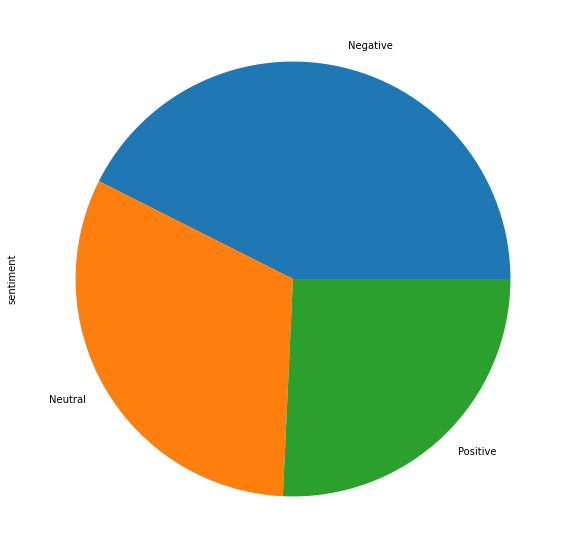

In [14]:
fig = plt.figure(figsize=(10,10))
df.groupby("sentiment")["sentiment"].count().plot.pie()
fig.savefig('../results/pie.png')